In [1]:
# set path to parent file
from pathlib import Path
import os
cwd_path = Path.cwd()
set_path = str(cwd_path.parent)
os.chdir(set_path)

In [2]:
from Utils import running_mean, multiple_runs_with_different_seed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import importlib
import SimulatedAnealing 
importlib.reload(SimulatedAnealing)
SimulatedAnnealing = SimulatedAnealing.SimulatedAnnealing
mpl.rcParams['figure.dpi'] = 300
from rana import rana_func

# What do we want?
    - adaptive cooling doesn't seem to help
    - unable to keep acceptence probability up

# Average Performance

# Plots Cholseky

In [9]:
configuration = {"pertubation_method": "Cholesky",
                     "x_length": 5,
                     "x_bounds": (-500, 500),
                     "annealing_schedule":"adaptive_cooling",
                     "objective_function": rana_func,
                     "maximum_archive_length": 100,
                     "archive_minimum_acceptable_dissimilarity": 0.2,
                     "maximum_markov_chain_length": 50,
                     "maximum_function_evaluations": 10000,
                     "step_size_initialisation_fraction_of_range": 0.05,
                     "bound_enforcing_method": "not_clipping",
                     "cholesky_path_length": 5,
                    }
#"simple_exponential_cooling"

In [10]:
np.random.seed(0)
rana_2d_chol = SimulatedAnnealing(**configuration)
x_result_chol, objective_result_chol = rana_2d_chol.run()
print(f"x_result = {x_result_chol} \n objective_result = {objective_result_chol} \n "
      f"number of function evaluations = {rana_2d_chol.objective_function_evaluation_count}")
print(f"best objective result {rana_2d_chol.objective_history_array.min()}")

x_result = [-333.474721    137.39351878 -204.97277243  187.44550048 -299.7557875 ] 
 objective_result = -557.0602600621185 
 number of function evaluations = 10000
best objective result -1442.3292198730408


In [11]:
rana_2d_chol.alpha_history_array[:, 0]

array([0.95, 1.5 , 0.8 , 0.8 , 1.5 , 0.8 , 0.8 , 0.8 , 1.5 , 0.8 , 0.8 ,
       0.8 , 0.8 , 1.5 , 0.8 , 0.8 , 1.5 , 0.8 , 0.8 , 0.8 , 0.8 , 1.5 ,
       1.5 , 0.8 , 0.8 , 0.8 , 1.5 , 0.8 , 0.8 , 1.5 , 0.8 , 0.8 , 1.5 ,
       0.8 , 0.8 , 1.5 , 0.8 , 0.8 , 1.5 , 0.8 , 1.5 , 0.8 , 0.8 , 1.5 ,
       0.8 , 0.8 , 1.5 , 0.8 , 0.8 , 0.8 , 0.8 , 1.5 , 0.8 , 0.8 , 1.5 ,
       0.8 , 0.8 , 0.8 , 1.5 , 0.8 , 1.5 , 0.8 , 1.5 , 0.8 , 0.8 , 1.5 ,
       0.8 , 0.8 , 0.8 , 0.8 , 0.8 , 1.5 , 1.5 , 0.8 , 0.8 , 0.8 , 1.5 ,
       1.5 , 0.8 , 0.8 , 1.5 , 0.8 , 0.8 , 0.8 , 0.8 , 1.5 , 0.8 , 1.5 ,
       1.5 , 0.8 , 0.8 , 1.5 , 0.8 , 0.8 , 0.8 , 0.8 , 0.8 , 1.5 , 1.5 ,
       1.5 , 0.8 , 0.8 , 0.8 , 0.8 , 1.5 , 0.8 , 0.8 , 0.8 , 1.5 , 1.5 ,
       0.8 , 0.8 , 0.8 , 0.8 , 1.5 , 0.8 , 0.8 , 0.8 , 1.5 , 1.5 , 1.5 ,
       0.8 , 0.8 , 0.8 , 0.8 , 1.5 , 1.5 , 0.8 , 0.8 , 0.8 , 0.8 , 1.5 ,
       0.8 , 1.5 , 0.8 , 0.8 , 1.5 , 1.5 , 0.8 , 0.8 , 0.8 , 0.8 , 0.8 ,
       1.5 , 1.5 , 0.8 , 0.8 , 0.8 , 0.8 , 1.5 , 0.

(0.0, 2.1)

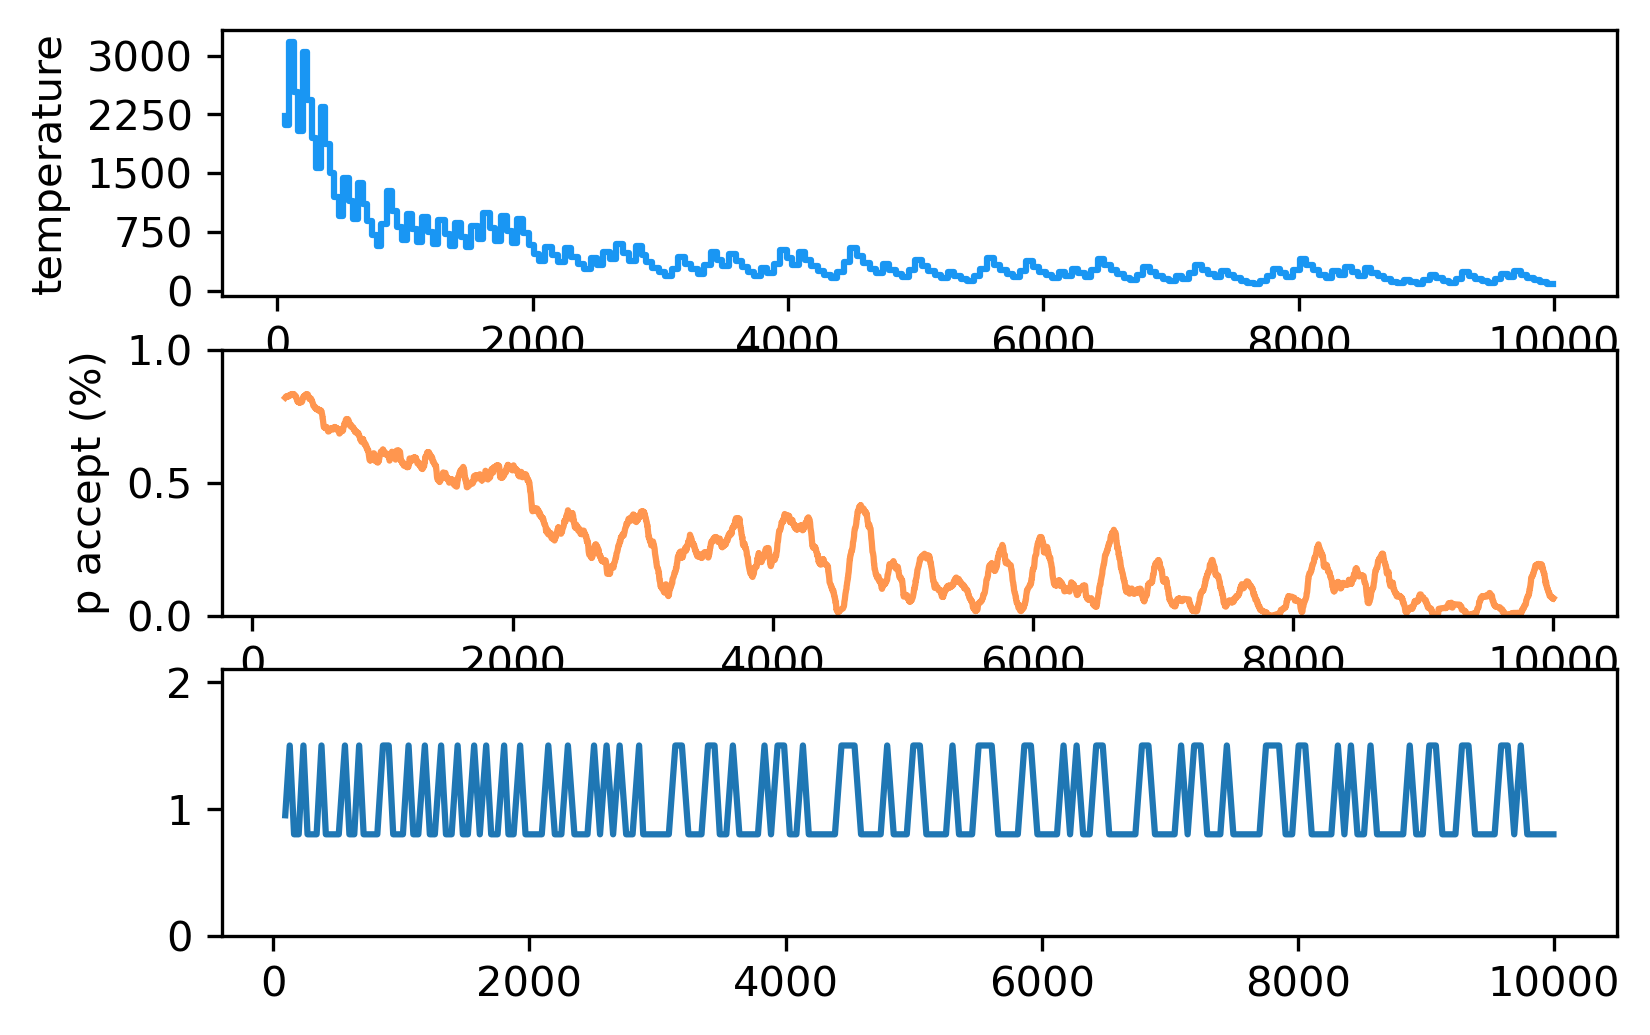

In [12]:
fig, axs = plt.subplots(3,1)
cols = mpl.cm.rainbow(np.linspace(0.2,0.8,3))

axs[0].step(rana_2d_chol.temperature_history_array[:, 2], rana_2d_chol.temperature_history_array[:, 0], color=cols [0])
axs[0].set_yticks(np.linspace(0, np.around(rana_2d_chol.temperature_history_array[:, 0].max(), -3), 5))
p_accept_running_mean = running_mean(rana_2d_chol.probability_of_acceptance_history_array[:, 0], 100)
axs[1].plot(rana_2d_chol.probability_of_acceptance_history_array[-len(p_accept_running_mean):, 1], p_accept_running_mean
           , color=cols [2])
axs[2].plot(rana_2d_chol.alpha_history_array[:, 1], rana_2d_chol.alpha_history_array[:, 0])

axs[1].set_ylim(0,1)
axs[0].set_ylabel("temperature")
axs[1].set_ylabel("p accept (%)")
axs[2].set_ylim(0,2.1)

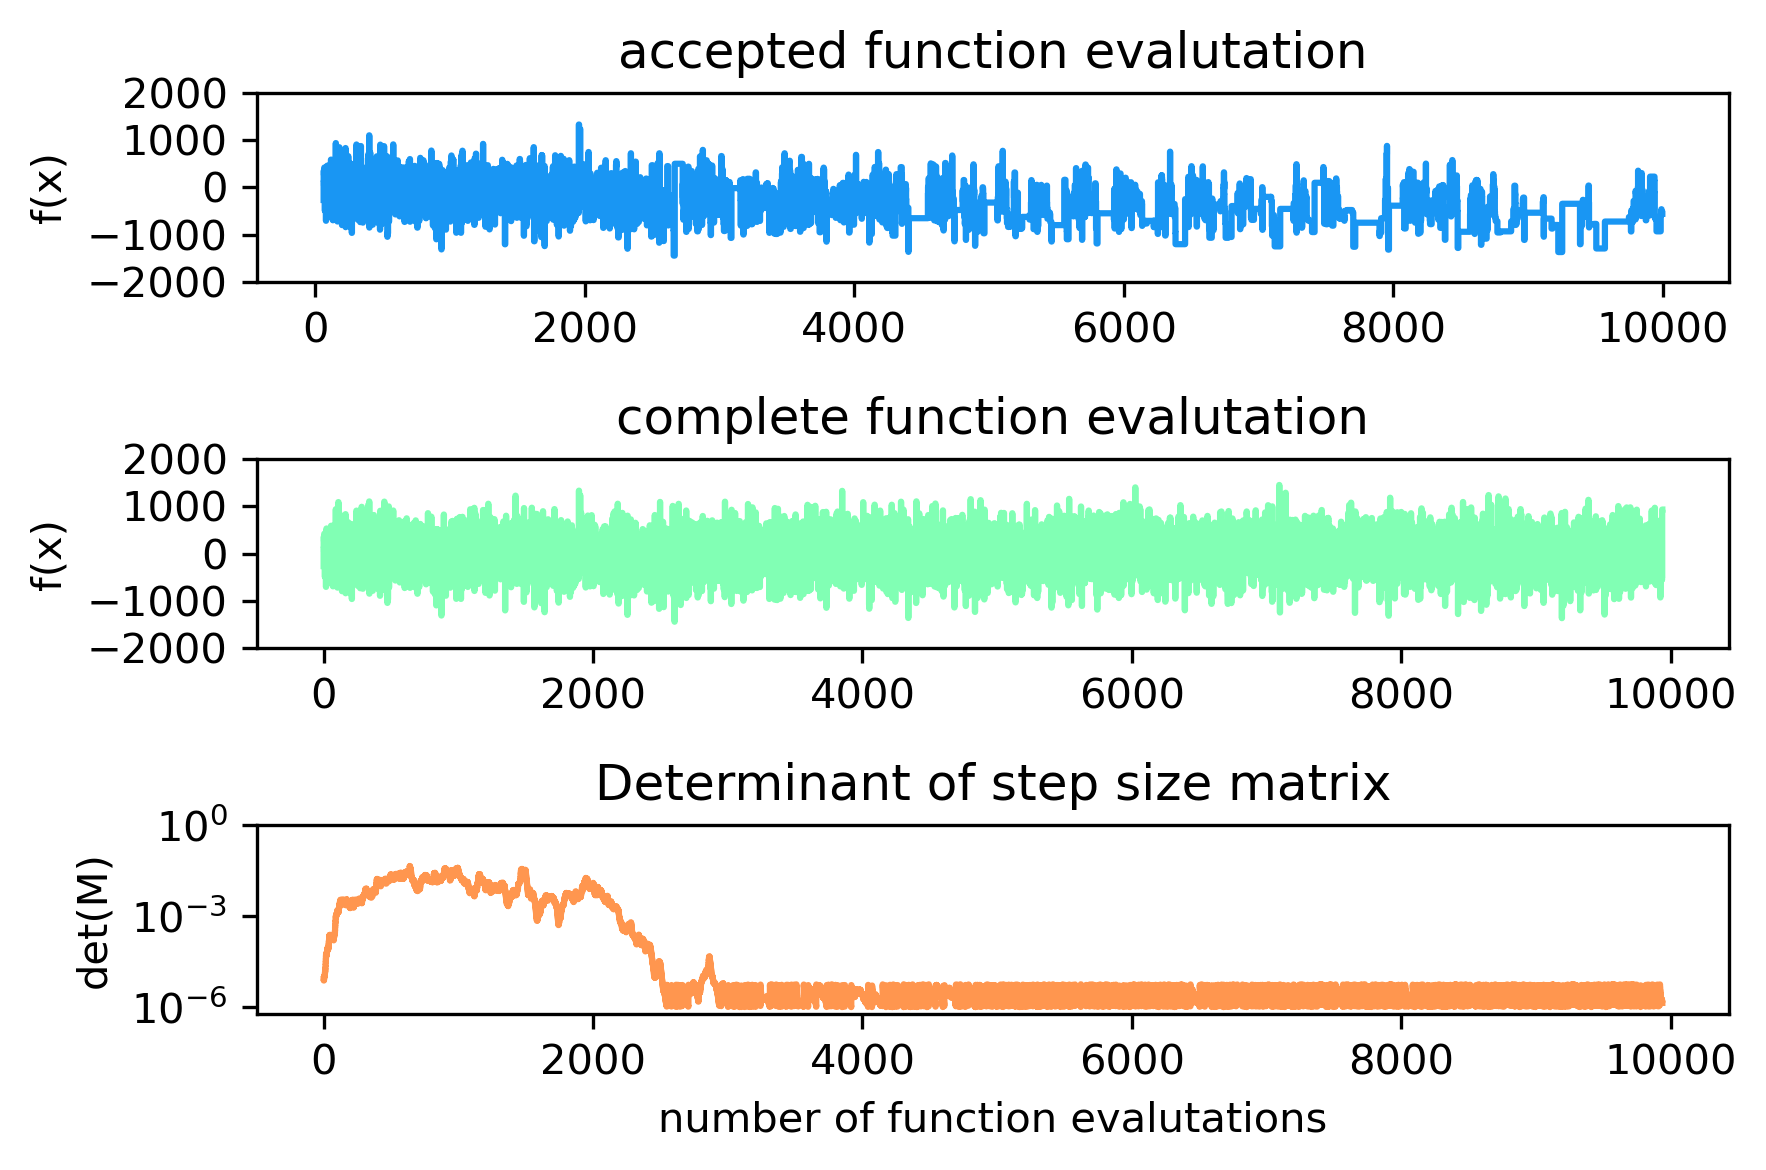

In [13]:
fig, axs = plt.subplots(3,1)
cols = mpl.cm.rainbow(np.linspace(0.2,0.8,3))
axs[0].step(rana_2d_chol.accepted_objective_history_array[:, 1], rana_2d_chol.accepted_objective_history_array[:, 0], color=cols[0])
axs[1].step(np.arange(len(rana_2d_chol.objective_history_array)), rana_2d_chol.objective_history_array, color=cols[1])
axs[2].step(np.arange(len(np.linalg.det(rana_2d_chol.step_size_matrix_history_array))),
                      np.linalg.det(rana_2d_chol.step_size_matrix_history_array), color=cols[2])

axs[0].set_yticks(np.linspace(-2000, 2000, 5))
axs[0].set_title("accepted function evalutation")
axs[0].set_ylabel("f(x)")


axs[1].set_yticks(np.linspace(-2000, 2000, 5))
axs[1].set_title("complete function evalutation")
axs[1].set_ylabel("f(x)")


axs[2].set_title("Determinant of step size matrix")
axs[2].set_ylabel("det(M)")
axs[2].set_xlabel("number of function evalutations")
axs[2].set_yscale("log")
axs[2].set_yticks([1e-6,1e-3, 1])


fig.tight_layout()

# Diagonal Plot

In [14]:
configuration = {"pertubation_method": "Diagonal",
                     "x_length": 5,
                     "x_bounds": (-500, 500),
                     "annealing_schedule":"adaptive_cooling",
                     "objective_function": rana_func,
                     "maximum_archive_length": 100,
                     "archive_minimum_acceptable_dissimilarity": 0.2,
                     "maximum_markov_chain_length": 200,
                     "maximum_function_evaluations": 10000,
                     "step_size_initialisation_fraction_of_range": 0.2,
                     "bound_enforcing_method": "not_clipping",
                     "cholesky_path_length": 7,
                    }
np.random.seed(0)
rana_2d_chol = SimulatedAnnealing(**configuration)
x_result_chol, objective_result_chol = rana_2d_chol.run()
print(f"x_result = {x_result_chol} \n objective_result = {objective_result_chol} \n "
      f"number of function evaluations = {rana_2d_chol.objective_function_evaluation_count}")
print(f"best objective result {rana_2d_chol.objective_history_array.min()}")

x_result = [-251.02449926  291.39977034 -365.66989844 -470.11630461  460.05418844] 
 objective_result = -833.59648574368 
 number of function evaluations = 10000
best objective result -1490.7047080208254


(0.0, 2.1)

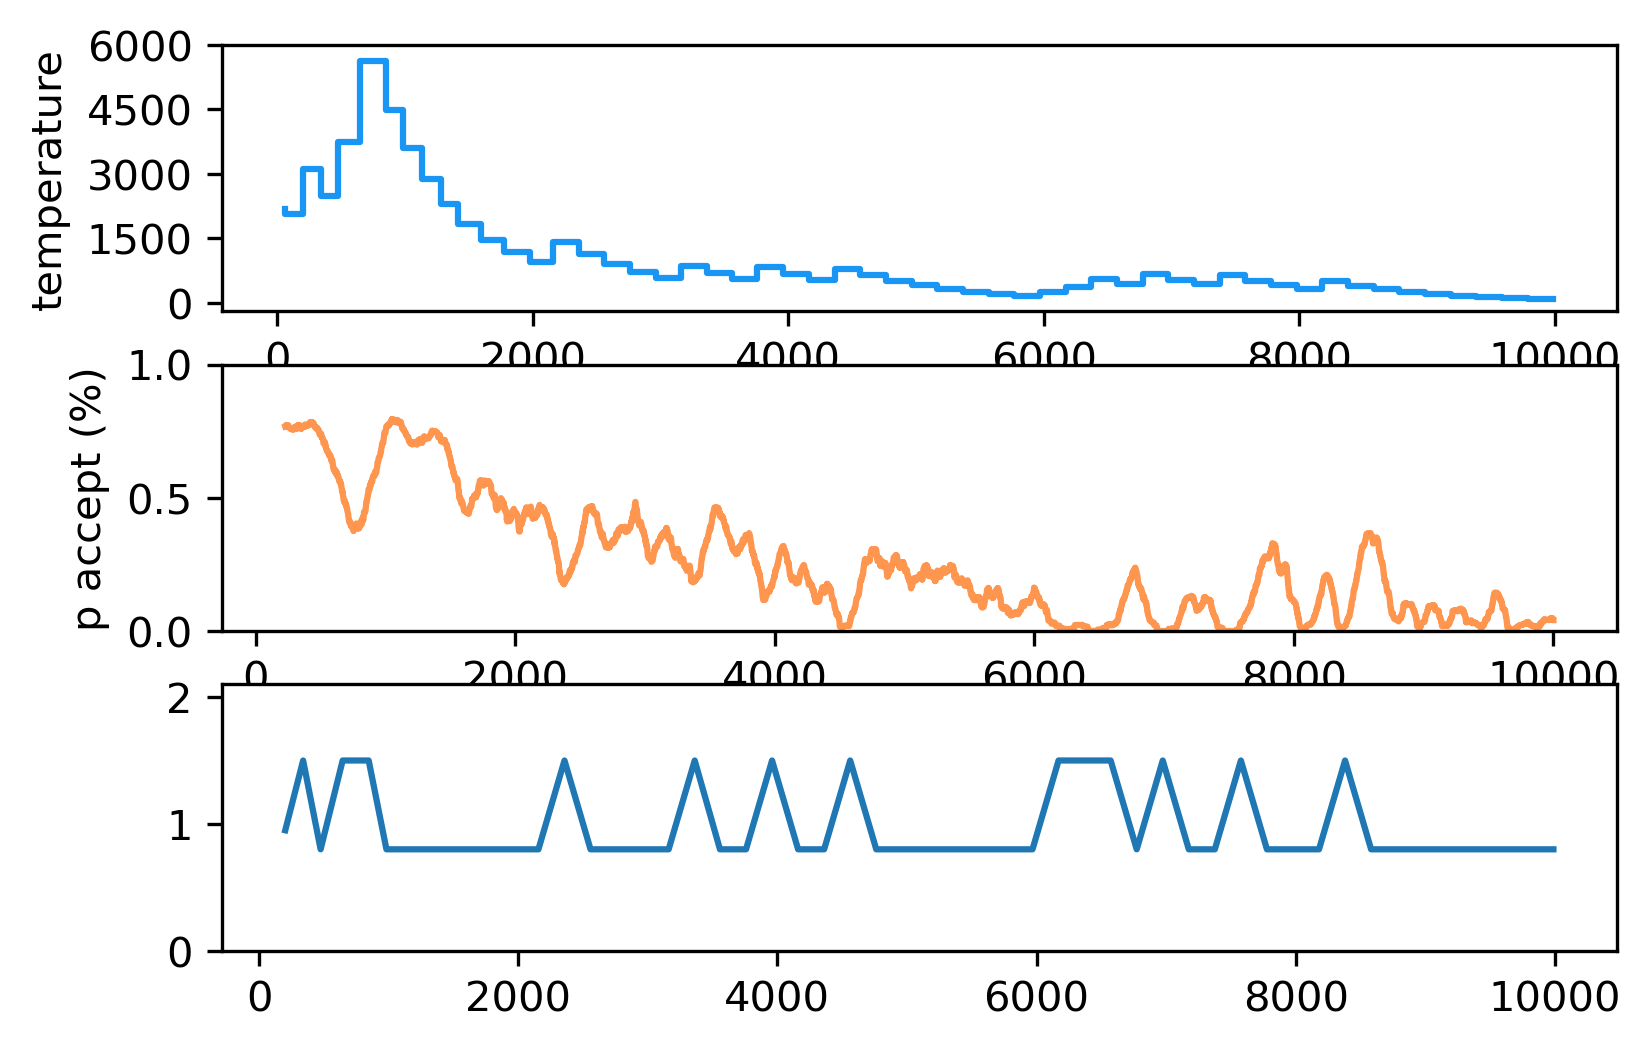

In [15]:
fig, axs = plt.subplots(3,1)
cols = mpl.cm.rainbow(np.linspace(0.2,0.8,3))

axs[0].step(rana_2d_chol.temperature_history_array[:, 2], rana_2d_chol.temperature_history_array[:, 0], color=cols [0])
axs[0].set_yticks(np.linspace(0, np.around(rana_2d_chol.temperature_history_array[:, 0].max(), -3), 5))
p_accept_running_mean = running_mean(rana_2d_chol.probability_of_acceptance_history_array[:, 0], 100)
axs[1].plot(rana_2d_chol.probability_of_acceptance_history_array[-len(p_accept_running_mean):, 1], p_accept_running_mean
           , color=cols [2])
axs[2].plot(rana_2d_chol.alpha_history_array[:, 1], rana_2d_chol.alpha_history_array[:, 0])

axs[1].set_ylim(0,1)
axs[0].set_ylabel("temperature")
axs[1].set_ylabel("p accept (%)")
axs[2].set_ylim(0,2.1)

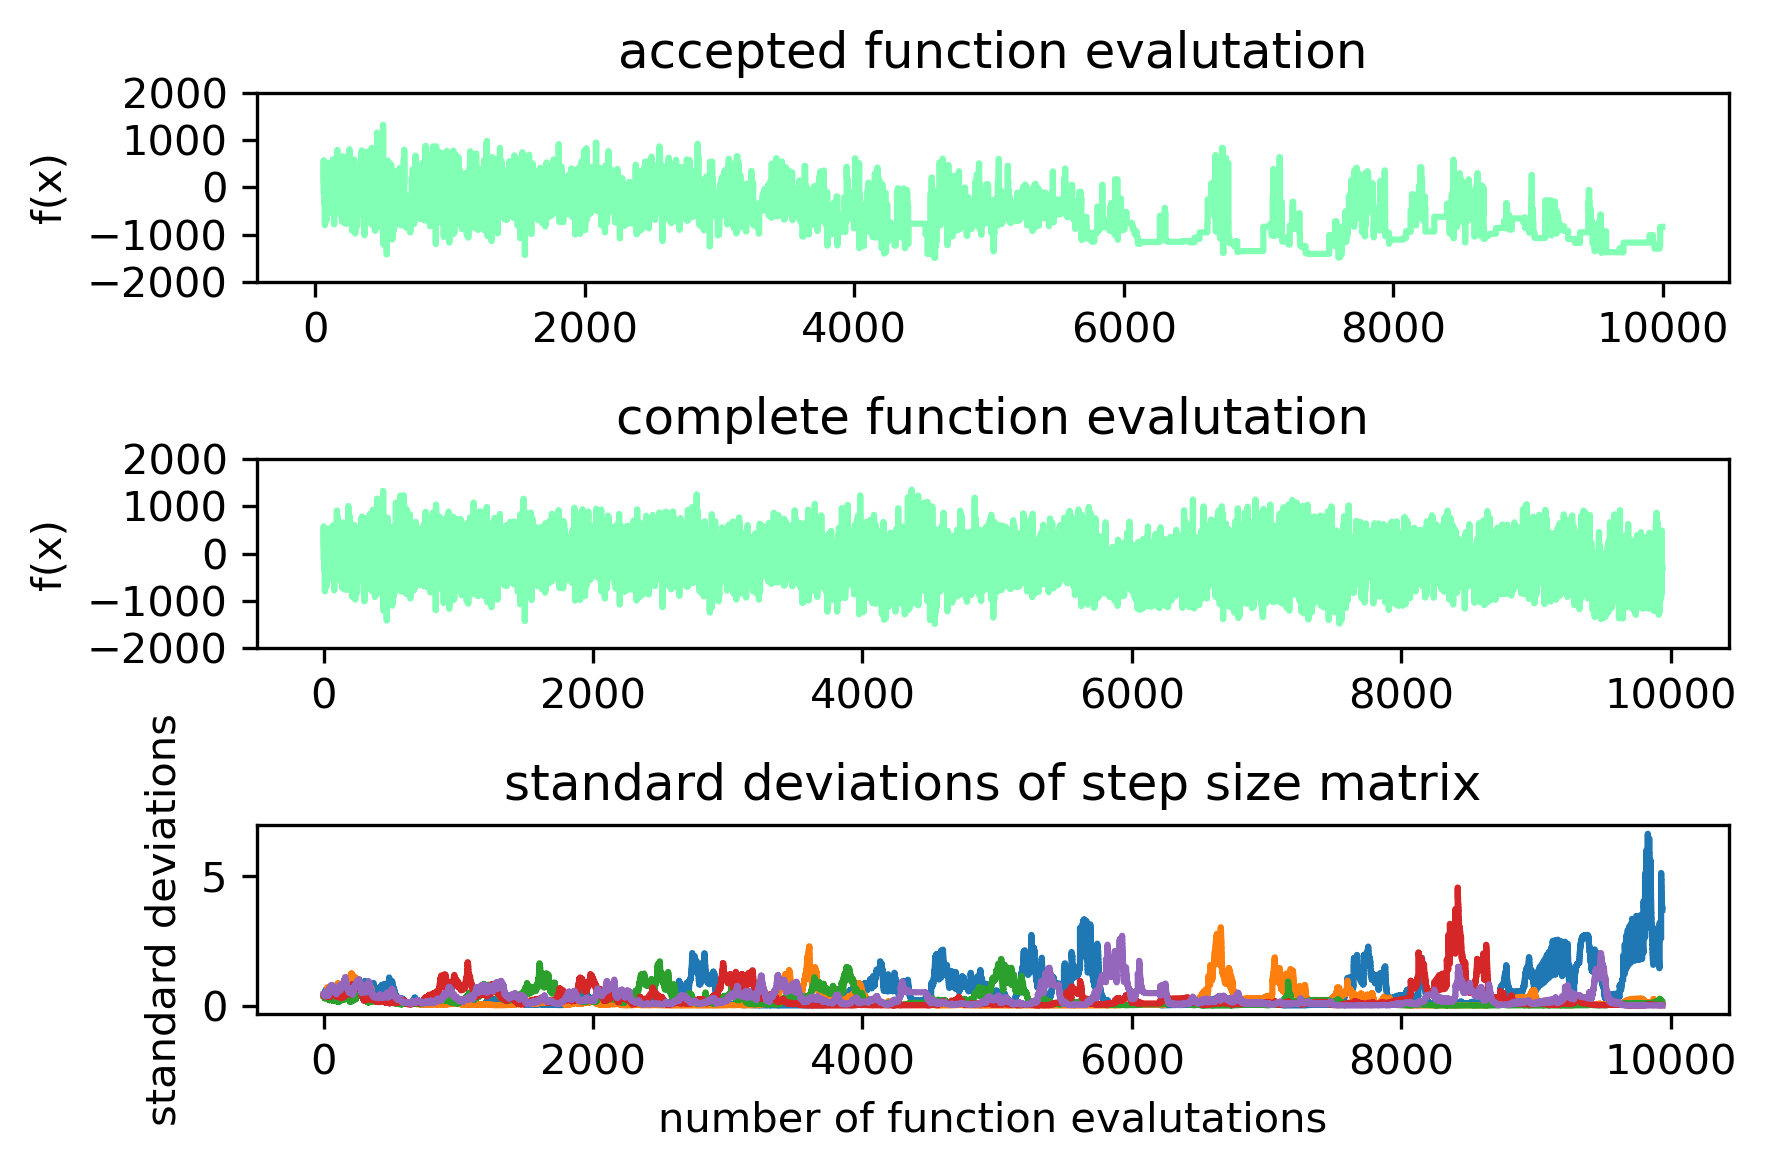

In [16]:
fig, axs = plt.subplots(3,1)
cols = mpl.cm.rainbow(np.linspace(0.2,0.8,3))
axs[0].step(rana_2d_chol.accepted_objective_history_array[:, 1], rana_2d_chol.accepted_objective_history_array[:, 0], color=cols[1])
axs[1].step(np.arange(len(rana_2d_chol.objective_history_array)), rana_2d_chol.objective_history_array, color=cols[1])
axs[2].step(np.arange(rana_2d_chol.step_size_matrix_history_array.shape[0]),
                      rana_2d_chol.step_size_matrix_history_array)

axs[0].set_yticks(np.linspace(-2000, 2000, 5))
axs[0].set_title("accepted function evalutation")
axs[0].set_ylabel("f(x)")


axs[1].set_yticks(np.linspace(-2000, 2000, 5))
axs[1].set_title("complete function evalutation")
axs[1].set_ylabel("f(x)")


axs[2].set_title("standard deviations of step size matrix")
axs[2].set_ylabel("standard deviations")
axs[2].set_xlabel("number of function evalutations")


fig.tight_layout()

In [17]:
rana_2d_chol.step_size_matrix_history_array.shape

(9939, 5)